In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def v(s, v_max, k_m):
    return (v_max * s) / (k_m + s)

In [3]:
data = np.array([[3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 0],
                 [0.004407692, 0.004192308, 0.003553846, 0.002576923, 0.001661538, 0.001064286, 0.004835714, 0.004671429, 0.0039, 0.002857143, 0.00175, 0.001057143, 0.004907143, 0.004521429, 0.00375, 0.002764286, 0.001857143, 0.001121429, 0]]).T

v_real = data[:, 1]
s_real = data[:, 0]
data

array([[3.600000e+00, 4.407692e-03],
       [1.800000e+00, 4.192308e-03],
       [9.000000e-01, 3.553846e-03],
       [4.500000e-01, 2.576923e-03],
       [2.250000e-01, 1.661538e-03],
       [1.125000e-01, 1.064286e-03],
       [3.600000e+00, 4.835714e-03],
       [1.800000e+00, 4.671429e-03],
       [9.000000e-01, 3.900000e-03],
       [4.500000e-01, 2.857143e-03],
       [2.250000e-01, 1.750000e-03],
       [1.125000e-01, 1.057143e-03],
       [3.600000e+00, 4.907143e-03],
       [1.800000e+00, 4.521429e-03],
       [9.000000e-01, 3.750000e-03],
       [4.500000e-01, 2.764286e-03],
       [2.250000e-01, 1.857143e-03],
       [1.125000e-01, 1.121429e-03],
       [0.000000e+00, 0.000000e+00]])

In [4]:
def loss(theta):
    v_max, k_m = theta
    v_pred = v(s_real, v_max, k_m)
    return np.sum((v_real - v_pred)**2)

In [5]:
res = minimize(loss, [1, 1])
res.x

array([0.00541391, 0.43608116])

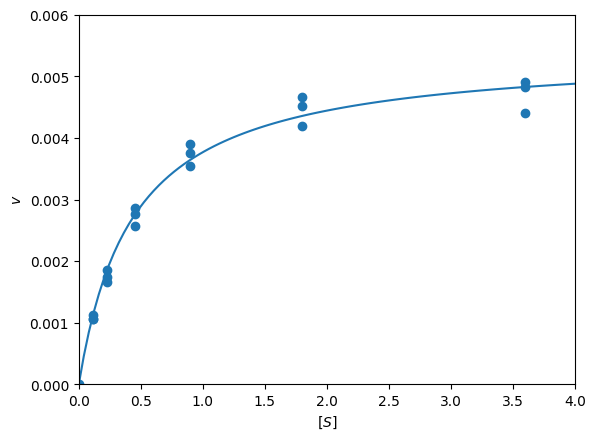

In [6]:
plt.scatter(s_real, v_real)
s_plot = np.linspace(0, 4, 100)
plt.plot(s_plot, v(s_plot, res.x[0], res.x[1]))
plt.xlim([0, 4])
plt.ylim([0, 0.006])
plt.xlabel('$[S]$')
plt.ylabel('$v$')
plt.show()